In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.unique(query_sample.values).shape

NameError: name 'query_sample' is not defined

In [4]:
np.unique(df_aln['tname'].values).shape

NameError: name 'df_aln' is not defined

In [5]:
query_sample

NameError: name 'query_sample' is not defined

In [9]:

# SCOPe benchmark performance per query
df_result = pd.read_csv('benchmark/result_fs.rocx', delimiter='\t')

dali_score = pd.read_csv('hyperparameter/dali.txt', delimiter='\t', header = None)
# Sample from those queries that appear in the results (other can get filtered out)
query_sample = df_result.sample(100, random_state=42)['NAME']

# Read Foldseek alignments
df_aln = pd.read_csv('benchmark/fs_out.tsv', delimiter='\t', names='qname,tname,evalue,bits'.split(','))

# Take top alignments for query subset
df_subset = df_aln[df_aln["qname"].isin(query_sample)].groupby("qname").head(3000000000)

# Save subset as tsv
df_subset.to_csv('scope500/foldseek_querysubset.tsv', sep='\t', index=False, header=False)

In [10]:
df_subset

,qname,tname,evalue,bits
43313,d1h97a_,d1h97a_,8.479000e-23,1096
43314,d1h97a_,d1mbaa_,1.675000e-05,232
43315,d1h97a_,d2wtga_,6.543000e-05,202
43316,d1h97a_,d1x9fc_,8.858000e-05,192
43317,d1h97a_,d1urva_,3.129000e-04,186
...,...,...,...,...
5226762,d1oota_,d1nlta3,8.466000e+00,7
5226763,d1oota_,d1smxa_,5.940000e+00,7
5226764,d1oota_,d1fmba_,9.527000e+00,7
5226765,d1oota_,d1kk1a1,8.981000e+00,7


In [5]:
df_all[~df_aln.isin(df_subset)].dropna().to_csv("hyperparameter/scope100_first1000_missing.csv", sep='\t', header=False, index = False)

NameError: name 'df_all' is not defined

In [6]:
df_all[~df_aln[["qname", 'tname']].isin(df_subset[[0,1]]).all(axis=1)]#.dropna()

NameError: name 'df_all' is not defined

In [7]:
df_subset[df_subset[[0,1]].isin(df_aln[["qname", 'tname']]).all(axis=1)]#.dropna()

KeyError: "None of [Int64Index([0, 1], dtype='int64')] are in the [columns]"

In [ ]:
df_all[(df_all['qname'] == 'd1bf6a_') & df_all['tname'] == 'd2a3la1']

In [12]:
dali_subset = dali_score[dali_score[0].isin(query_sample)]

In [11]:
dali_subset = dali_subset.sort_values([0,2], ascending=[False, False])
df_subset.to_csv("hyperparameter/scope100_first300_dali.csv", sep='\t', header=False, index = False)

In [14]:
dali_subset

,0,1,2
10916,d3pt8a_,d3pt8a_,31.4
28802,d3pt8a_,d1b0ba_,22.4
32261,d3pt8a_,d1urva_,21.3
32591,d3pt8a_,d1naza_,21.2
37988,d3pt8a_,d2g3ha_,19.7
...,...,...,...
4686283,d1alla_,d1eg3a1,2.0
4686284,d1alla_,d1ecma_,2.0
4686285,d1alla_,d1chua1,2.0
4686286,d1alla_,d1b67a_,2.0


In [7]:
columns_titles = [1,0,2]
dali_swap = dali_score.reindex(columns=columns_titles)

,0,1,2
0,d2gi3a1,d2gi3a1,82.4
1,d1a12a_,d1a12a_,82.2
2,d1ocka_,d1ocka_,81.2
3,d2wapa_,d2wapa_,81.1
4,d1uuqa_,d1uuqa_,79.5
...,...,...,...
4687708,d16vpa_,d1io1a_,2.0
4687709,d16vpa_,d1dc1a_,2.0
4687710,d12asa_,d3bwga2,2.0
4687711,d12asa_,d2vjva1,2.0


In [79]:
df_aln

,qname,tname,evalue,bits
0,d1m1ca_,d1m1ca_,0.000,6052
1,d1m1ca_,d1r9fa_,4.496,23
2,d1m1ca_,d1r0ua_,1.062,23
3,d1m1ca_,d1kkea2,4.253,21
4,d1m1ca_,d1vl4a_,4.496,21
...,...,...,...,...
5245830,d1y6xa1,d1y6ia1,9.999,11
5245831,d1y6xa1,d1hw1a2,9.439,11
5245832,d1y6xa1,d1pu6a_,7.940,11
5245833,d1y6xa1,d1lnqa2,9.439,10


In [87]:
dali_score

,qname,tname,dali
0,d2gi3a1,d2gi3a1,82.4
1,d1a12a_,d1a12a_,82.2
2,d1ocka_,d1ocka_,81.2
3,d2wapa_,d2wapa_,81.1
4,d1uuqa_,d1uuqa_,79.5
...,...,...,...
4687708,d16vpa_,d1io1a_,2.0
4687709,d16vpa_,d1dc1a_,2.0
4687710,d12asa_,d3bwga2,2.0
4687711,d12asa_,d2vjva1,2.0


In [86]:
dali_score.rename(columns={0: 'qname', 1: 'tname', 2:'dali'}, inplace=True)

In [96]:
dali_score = pd.merge(df_subset, df_aln, how = 'inner', on =["qname", "tname"])

In [93]:
dali_score

,qname,tname,dali,evalue,bits
0,d3n9ka_,d3n9ka_,75.8,7.079000e-90,3528
1,d2fhfa5,d2fhfa5,71.8,0.000000e+00,5082
2,d2fvka2,d2fvka2,71.0,4.569000e-86,3278
3,d3ckca_,d3ckca_,69.8,5.186000e-95,4384
4,d2q7wa_,d2q7wa_,67.6,3.385000e-76,3305
...,...,...,...,...,...
18116,d1alla_,d2idxa_,2.0,1.204000e+00,33
18117,d1alla_,d1quua1,2.0,2.769000e+00,17
18118,d1alla_,d1pfva1,2.0,8.548000e+00,11
18119,d1alla_,d1nxha_,2.0,8.548000e+00,15


In [251]:
df_aln

,qname,tname,evalue,bits
0,d1m1ca_,d1m1ca_,0.000,6052
1,d1m1ca_,d1r9fa_,4.496,23
2,d1m1ca_,d1r0ua_,1.062,23
3,d1m1ca_,d1kkea2,4.253,21
4,d1m1ca_,d1vl4a_,4.496,21
...,...,...,...,...
5245830,d1y6xa1,d1y6ia1,9.999,11
5245831,d1y6xa1,d1hw1a2,9.439,11
5245832,d1y6xa1,d1pu6a_,7.940,11
5245833,d1y6xa1,d1lnqa2,9.439,10


In [254]:
dali_score.columns = ["qname", "tname", "dali"]

In [197]:
pairs_df[pairs_df["query"] == "d1oota_",]

,query,target
45260,d1oota_,d1oota_
45261,d1oota_,d1j3ta_
45262,d1oota_,d2ak5a_
45263,d1oota_,d3iqla_
45264,d1oota_,d1uj0a_
...,...,...
45481,d1oota_,d1nlta3
45482,d1oota_,d1smxa_
45483,d1oota_,d1fmba_
45484,d1oota_,d1kk1a1


In [228]:
mr = pd.merge(pairs_df, dali_score, on=['query', 'target'], how= 'left')

In [230]:
mr = pd.merge(pairs_df2, mr, on=['query', 'target'], how= 'left')

In [231]:
mr

,query,target,score
0,d1h97a_,d1h97a_,31.4
1,d1h97a_,d1mbaa_,17.6
2,d1h97a_,d2wtga_,14.9
3,d1h97a_,d1x9fc_,17.0
4,d1h97a_,d1urva_,18.0
...,...,...,...
45481,d1oota_,d1nlta3,NaN
45482,d1oota_,d1smxa_,NaN
45483,d1oota_,d1fmba_,NaN
45484,d1oota_,d1kk1a1,NaN


In [138]:
df_subset["dom"] = scop_dom
df_subset["fold"] = scop_fold
df_subset["sfam"] = scop_sfam
df_subset["fam"] = scop_fam

In [167]:
df_subset["score"] = scores

In [168]:
df_subset

,qname,tname,evalue,bits,score
43313,d1h97a_,d1h97a_,8.479000e-23,1096,1111
43314,d1h97a_,d1mbaa_,1.675000e-05,232,1111
43315,d1h97a_,d2wtga_,6.543000e-05,202,1110
43316,d1h97a_,d1x9fc_,8.858000e-05,192,1111
43317,d1h97a_,d1urva_,3.129000e-04,186,1111
...,...,...,...,...,...
5226762,d1oota_,d1nlta3,8.466000e+00,7,1
5226763,d1oota_,d1smxa_,5.940000e+00,7,1000
5226764,d1oota_,d1fmba_,9.527000e+00,7,1001
5226765,d1oota_,d1kk1a1,8.981000e+00,7,1001


In [98]:
dali_score

,qname,tname,dali,evalue,bits
58,d3pt8a_,d3pt8a_,31.4,3.252000e-22,1097
162,d3pt8a_,d1b0ba_,22.4,3.390000e-08,375
184,d3pt8a_,d1urva_,21.3,1.021000e-05,267
186,d3pt8a_,d1naza_,21.2,1.513000e-05,259
240,d3pt8a_,d2g3ha_,19.7,9.915000e-04,187
...,...,...,...,...,...
18116,d1alla_,d2idxa_,2.0,1.204000e+00,33
18117,d1alla_,d1quua1,2.0,2.769000e+00,17
18118,d1alla_,d1pfva1,2.0,8.548000e+00,11
18119,d1alla_,d1nxha_,2.0,8.548000e+00,15


In [49]:
query_sample.to_csv('100vsall/samples.csv', sep='\t', index=False, header=False)

In [97]:
dali_score = dali_score.sort_values(["qname","dali"], ascending=[False, False])

In [66]:
df = df_subset.sort_values(["qname", "evalue"], ascending=[True, True])#.groupby('scop').head(10000000)

In [164]:
scores = []
for i in range(len(df_subset["qname"].values)):
    #df_subset["family"] = df_result[df_subset["qname"][i] == df_result["NAME"]]["SCOP"]
    q = scope_lookup[df_subset["qname"].values[i] == scope_lookup[0]][1].values[0].split(".")
    t = scope_lookup[df_subset["tname"].values[i] == scope_lookup[0]][1].values[0].split(".")
    
    score = (q[0] == t[0])*1000 + (q[1] == t[1])*100 +(q[2] == t[2])*10+ (q[3] == t[3])*1
    scores.append(score)
    

In [165]:
scores

[1111,
 1111,
 1110,
 1111,
 1111,
 1110,
 1110,
 1111,
 1111,
 1111,
 1111,
 1111,
 1110,
 1111,
 1111,
 1110,
 1111,
 1111,
 1111,
 1110,
 1111,
 1111,
 1111,
 1111,
 1110,
 1110,
 1110,
 1111,
 1111,
 1111,
 1111,
 1110,
 1111,
 1111,
 1111,
 1110,
 1111,
 1110,
 1110,
 1110,
 1010,
 1010,
 1000,
 1110,
 1010,
 1010,
 1010,
 1110,
 1000,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1000,
 1110,
 1010,
 1011,
 10,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 100,
 1110,
 1011,
 1010,
 1010,
 1010,
 1010,
 1011,
 1010,
 1010,
 1000,
 1010,
 1110,
 1010,
 1010,
 1010,
 1001,
 1011,
 1010,
 10,
 11,
 1000,
 1000,
 1000,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1000,
 10,
 10,
 1000,
 1000,
 1000,
 1010,
 1010,
 1010,
 10,
 1000,
 1000,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 10,
 1010,
 10,
 1010,
 1010,
 1010,
 1000,
 1000,
 1000,
 1010,
 11,
 1010,
 1010,
 10,
 1010,
 11,
 100,
 1010,
 1010,
 1

In [136]:
scop[0].split(".")[1]#[0:2]

'1'

In [14]:
pd.unique(df_subset["qname"]).shape

(3566,)

In [17]:
pd.unique(df_result["SCOP"]).shape

(703,)

In [26]:
df_subset.head(1000)

,qname,tname,evalue,bits,qstart,tstart,cigar
43313,d1h97a_,d1h97a_,8.479000e-23,1096,NaN,NaN,NaN
43314,d1h97a_,d1mbaa_,1.675000e-05,232,NaN,NaN,NaN
43315,d1h97a_,d2wtga_,6.543000e-05,202,NaN,NaN,NaN
43316,d1h97a_,d1x9fc_,8.858000e-05,192,NaN,NaN,NaN
43317,d1h97a_,d1urva_,3.129000e-04,186,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5226762,d1oota_,d1nlta3,8.466000e+00,7,NaN,NaN,NaN
5226763,d1oota_,d1smxa_,5.940000e+00,7,NaN,NaN,NaN
5226764,d1oota_,d1fmba_,9.527000e+00,7,NaN,NaN,NaN
5226765,d1oota_,d1kk1a1,8.981000e+00,7,NaN,NaN,NaN


In [270]:
scope_lookup

,0,1
0,d1dlwa_,a.1.1.1
1,d2gkma_,a.1.1.1
2,d2qrwa_,a.1.1.1
3,d1s69a_,a.1.1.1
4,d2bkma_,a.1.1.1
...,...,...
11206,d2fk4a1,g.90.1.1
11207,d2b9da1,g.91.1.1
11208,d2ewla1,g.91.1.1
11209,d2pkgc1,g.92.1.1


In [26]:
scope_lookup = pd.read_csv('hyperparameter/data/scop_lookup.fix.tsv', delimiter='\t', header = None)

In [43]:
align = pd.read_csv('100vsall/test3.csv', delimiter='\t', header = None)

In [44]:
qscope = []
tscope = []
for i in (range(align.shape[0])):
    #qscope.append(scope_lookup[scope_lookup[0] == align[0][i]][1].values[0])
    tscope.append(scope_lookup[scope_lookup[0] == align[1][i]][1].values[0])

In [45]:
align[3] = tscope
#align[4] = tscope

In [46]:
align

,0,1,2,3
0,d1rkta1,d1rkta1,1491.048171,a.4.1.9
1,d1rkta1,d3c07a1,731.093118,a.4.1.9
2,d1rkta1,d1ui5a1,694.591046,a.4.1.9
3,d1rkta1,d2gena1,676.693640,a.4.1.9
4,d1rkta1,d1vi0a1,676.178779,a.4.1.9
...,...,...,...,...
11206,d1rkta1,d4mt2a_,-100.091123,g.46.1.1
11207,d1rkta1,d2fug61,-100.317328,e.19.1.2
11208,d1rkta1,d1v87a_,-106.304428,g.44.1.1
11209,d1rkta1,d1ux6a2,-113.787724,g.75.1.1


In [47]:
align.to_csv("100vsall/test3.csv", sep='\t', header=False, index = False)

In [8]:
from tqdm import tqdm


In [14]:
#align.to_csv('hyperparameter/scope100_first1000_res_lol3diFB_highGP.csv', sep='\t', index=False, header=False)

In [13]:
align

,0,1,2,qscope,tscope
0,d3pt8a_,d3pt8a_,9021.002564,a.1.1.0,a.1.1.0
1,d3pt8a_,d1b0ba_,5647.431123,a.1.1.0,a.1.1.2
2,d3pt8a_,d1urva_,5524.694627,a.1.1.0,a.1.1.2
3,d3pt8a_,d1naza_,5380.918028,a.1.1.0,a.1.1.2
4,d3pt8a_,d1mbaa_,4940.139965,a.1.1.0,a.1.1.2
...,...,...,...,...,...
42997,d1alla_,d2zfya_,248.795278,a.1.1.3,d.3.1.0
42998,d1alla_,d2wf7a_,225.301136,a.1.1.3,c.108.1.6
42999,d1alla_,d1w53a_,224.836044,a.1.1.3,a.186.1.2
43000,d1alla_,d2ouxa1,190.456131,a.1.1.3,a.118.26.1


In [298]:
align[align[2].isnull()]

,0,1,2,3,4
1189,d3n9ka_,d3n9ka_,NaN,c.1.8.3,c.1.8.3
1580,d3ljqa_,d3ljqa_,NaN,d.153.1.5,d.153.1.5
2522,d3ckca_,d3ckca_,NaN,a.118.8.6,a.118.8.6
6461,d2q7wa_,d2q7wa_,NaN,c.67.1.1,c.67.1.1
6462,d2q7wa_,d1ajsa_,NaN,c.67.1.1,c.67.1.1
11881,d2fvka2,d2fvka2,NaN,c.1.9.6,c.1.9.6
12726,d2fhfa5,d2fhfa5,NaN,c.1.8.1,c.1.8.1
25144,d1rwha1,d1rwha1,NaN,a.102.3.2,a.102.3.2
29845,d1o5za2,d1o5za2,NaN,c.72.2.2,c.72.2.2
30845,d1nvma2,d1nvma2,NaN,c.1.10.5,c.1.10.5


In [153]:
lol3di = pd.read_csv('hyperparameter/result_lol3diFBTop5_subset.rocx', delimiter='\t')
lol3di_rescale  = pd.read_csv('hyperparameter/result_lol3diFBrescaleTop5_subset.rocx', delimiter='\t')

In [154]:
gt = pd.read_csv('hyperparameter/result_gt_subset.rocx', delimiter='\t')

In [159]:
all_res = pd.merge(pd.merge(lol3di, lol3di_rescale, how = 'inner', on =["NAME"]), gt, how = 'inner', on =["NAME"])

In [155]:
lol3di

,NAME,SCOP,FAM,SFAM,FOLD,FP,FAMCNT,SFAMCNT,FOLDCNT
0,d1b3aa_,d.9.1.1,0,0,0,0,12,14,15
1,d3ue2a_,d.58.7.0,0,0,0,0,3,82,347
2,d3mi02_,d.153.1.4,0,0,0,0,19,38,39
3,d1eu1a1,b.52.2.2,0,0,0,0,9,16,23
4,d2zoya1,a.4.1.9,0,0,0,0,34,102,335
...,...,...,...,...,...,...,...,...,...
3561,d1k5na1,b.1.1.2,0,0,0,0,25,144,402
3562,d1tc3c_,a.4.1.2,0,0,0,0,6,102,335
3563,d2guda1,b.77.3.1,0,0,0,0,4,5,9
3564,d1guwa_,b.34.13.2,0,0,0,0,12,18,137


In [156]:
gt[lol3di_rescale["NAME"] != lol3di["NAME"]]

,NAME,SCOP,FAM,SFAM,FOLD,FP,FAMCNT,SFAMCNT,FOLDCNT
378,d1of8a_,c.1.10.4,0,0,0,0,3,47,373
379,d2wzma_,c.1.7.0,0,0,0,0,3,10,373
573,d1vl2a1,c.26.2.1,0,0,0,0,10,33,73
574,d2q7wa_,c.67.1.1,1,"0,982759",0,5,18,75,77
930,d1yvua2,c.55.3.10,0,0,0,0,3,43,130
931,d3hyfa_,c.55.3.1,0,0,0,0,6,43,130
1007,d1kbia1,c.1.4.1,0,0,0,0,19,23,373
1008,d3a5fa_,c.1.10.1,0,0,0,0,21,47,373
1188,d2iuwa1,b.82.2.10,0,0,0,0,2,21,98
1189,d1rh8a_,b.7.1.2,0,0,0,0,9,23,30


In [144]:
lol3di_rescale[lol3di_rescale["NAME"] != gt["NAME"]]

,NAME,SCOP,FAM,SFAM,FOLD,FP,FAMCNT,SFAMCNT,FOLDCNT
124,d1yq2a4,b.30.5.1,0,0,0,0,2,23,29
319,d2b4aa1,c.23.1.1,0,0,0,0,25,46,150
574,d1vl2a1,c.26.2.1,0,0,0,0,10,33,73
1312,d2ch5a1,c.55.1.5,0,0,0,0,7,68,130
1972,d1ur3m_,c.1.7.1,0,0,0,0,7,10,373
2213,d1zuna1,c.26.2.2,0,0,0,0,2,33,73
2579,d3gdla_,c.1.2.3,0,0,0,0,7,27,373


In [129]:
lol3di

,NAME,SCOP,FAM,SFAM,FOLD,FP,FAMCNT,SFAMCNT,FOLDCNT
0,d1b3aa_,d.9.1.1,0,0,0,0,12,14,15
1,d3ue2a_,d.58.7.0,0,0,0,0,3,82,347
2,d3mi02_,d.153.1.4,0,0,0,0,19,38,39
3,d1eu1a1,b.52.2.2,0,0,0,0,9,16,23
4,d2zoya1,a.4.1.9,0,0,0,0,34,102,335
...,...,...,...,...,...,...,...,...,...
3561,d1k5na1,b.1.1.2,0,0,0,0,25,144,402
3562,d1tc3c_,a.4.1.2,0,0,0,0,6,102,335
3563,d2guda1,b.77.3.1,0,0,0,0,4,5,9
3564,d1guwa_,b.34.13.2,0,0,0,0,12,18,137


In [134]:
lol3di_rescale = lol3di_rescale[gt["FAM"] != "0"]
lol3di = lol3di[gt["FAM"] != "0"]
gt = gt[gt["FAM"] != "0"]

In [135]:
for i,j,k in zip(lol3di_rescale["NAME"], lol3di["NAME"], gt["NAME"]):
    print(i ==  j,k)

True d2v33a_
True d2nqca1
True d1m6ba1
True d2ifga1
True d2bhua1
True d2pl1a_
True d1bf6a_
True d1k8ua_
True d1yk4a_
True d1plsa_
True d3bw6a_
True d1l1oc_
True d1v5oa_
True d2cqka1
True d1hyua4
True d2adca1
False d2q7wa_
True d1jyaa_
True d1p6oa_
True d1th7a1
True d1ugla_
True d1m0ua2
True d1gpma1
True d1hc1a3
True d1sv0c_
True d2bz7a_
True d1urra_
True d2b5ea1
True d1wfqa_
True d2bkfa1
True d1ckaa_
True d2cpwa1
True d1rowa_
True d2vaca_
True d1twia1
True d2nrac1
True d2y8ga_
True d1qp8a2
True d1alla_
True d1k92a1
True d2dfka2
True d1ogya1
True d1ayja_
True d2dk5a1
True d2fvka2
True d1h97a_
True d1p7hl2
True d2jhfa1
True d1jjcb3
True d3ckca_
True d1czpa_
True d1qpoa2
True d2huga1
True d1ypzf1
True d2hq7a1
True d1ivha1
True d3ljqa_
True d2bwba_
True d1rkta1
True d3edha_
True d1uoca_
True d3pt8a_
True d1cqxa1
True d1h6ka1
True d2byea1
True d1vq8n1
True d1nvma2
True d2nuha_
True d1vc1a_
True d2b6ca1
True d2xiga_
True d1n57a_
True d2f4pa1
False d3ersx_
True d1l2ha_
True d1oota_
True d1vd4

In [160]:
all_res

,NAME,SCOP_x,FAM_x,SFAM_x,FOLD_x,FP_x,FAMCNT_x,SFAMCNT_x,FOLDCNT_x,SCOP_y,...,SFAMCNT_y,FOLDCNT_y,SCOP,FAM,SFAM,FOLD,FP,FAMCNT,SFAMCNT,FOLDCNT
0,d1b3aa_,d.9.1.1,0,0,0,0,12,14,15,d.9.1.1,...,14,15,d.9.1.1,0,0,0,0,12,14,15
1,d3ue2a_,d.58.7.0,0,0,0,0,3,82,347,d.58.7.0,...,82,347,d.58.7.0,0,0,0,0,3,82,347
2,d3mi02_,d.153.1.4,0,0,0,0,19,38,39,d.153.1.4,...,38,39,d.153.1.4,0,0,0,0,19,38,39
3,d1eu1a1,b.52.2.2,0,0,0,0,9,16,23,b.52.2.2,...,16,23,b.52.2.2,0,0,0,0,9,16,23
4,d2zoya1,a.4.1.9,0,0,0,0,34,102,335,a.4.1.9,...,102,335,a.4.1.9,0,0,0,0,34,102,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,d1k5na1,b.1.1.2,0,0,0,0,25,144,402,b.1.1.2,...,144,402,b.1.1.2,0,0,0,0,25,144,402
3562,d1tc3c_,a.4.1.2,0,0,0,0,6,102,335,a.4.1.2,...,102,335,a.4.1.2,0,0,0,0,6,102,335
3563,d2guda1,b.77.3.1,0,0,0,0,4,5,9,b.77.3.1,...,5,9,b.77.3.1,0,0,0,0,4,5,9
3564,d1guwa_,b.34.13.2,0,0,0,0,12,18,137,b.34.13.2,...,18,137,b.34.13.2,0,0,0,0,12,18,137


In [164]:
max_fam = []
gt_fam = []
for i,j,k in zip(all_res["FAM_x"], all_res["FAM_y"], all_res["FAM"]):
    if k != "0":
        max_fam.append(max(float(i.replace(',', '.')), float(j.replace(',', '.'))))
        gt_fam.append(float(k.replace(',', '.')))

In [165]:
max_sfam = []
gt_sfam = []
for i,j,k in zip(all_res["SFAM_x"], all_res["SFAM_y"], all_res["SFAM"]):
    if k != "0":
        max_sfam.append(max(float(i.replace(',', '.')), float(j.replace(',', '.'))))
        gt_sfam.append(float(k.replace(',', '.')))

In [166]:
max_fold = []
gt_fold = []
for i,j,k in zip(all_res["FOLD_x"], all_res["FOLD_y"], all_res["FOLD"]):
    if k != "0":
        max_fold.append(max(float(i.replace(',', '.')), float(j.replace(',', '.'))))
        gt_fold.append(float(k.replace(',', '.')))

In [168]:
np.mean(max_fam), np.mean(gt_fam)

(0.9287447799999999, 0.9401402999999999)

In [169]:
np.mean(max_sfam), np.mean(gt_sfam)

(0.6469203333333333, 0.7124932121212121)

In [170]:
np.mean(max_fold), np.mean(gt_fold)

(0.3118187850588235, 0.5325887897647059)

In [137]:
max_sfam = []
for i,j in zip(lol3di_rescale["SFAM"], lol3di["SFAM"]):
    max_sfam.append(max(float(i.replace(',', '.')), float(j.replace(',', '.'))))

In [138]:
max_fold = []
for i,j in zip(lol3di_rescale["FOLD"], lol3di["FOLD"]):
    max_fold.append(max(float(i.replace(',', '.')), float(j.replace(',', '.'))))

In [139]:
gt_fam, gt_sfam, gt_fold = [],[],[]
for i,j,k in zip(gt["FAM"],  gt["SFAM"], gt["FOLD"]):
    gt_fam.append(float(i.replace(',', '.')))
    gt_sfam.append(float(j.replace(',', '.')))
    gt_fold.append(float(k.replace(',', '.')))


In [46]:
lol3di_rescale["FAM"]

115          0,6
123            1
149          0,5
157     0,380952
181     0,958333
          ...   
3253       0,625
3306           1
3330           1
3381           1
3418           1
Name: FAM, Length: 98, dtype: object

In [103]:
print(lol3di[np.array(max_fam) > np.array(gt_fam)]["NAME"])
print(gt[np.array(max_fam) > np.array(gt_fam)]["NAME"])

3035    d1t33a1
767     d1ugla_
3253    d1uw4b_
1689    d1ypzf1
2037    d2b6ca1
2975    d2bs2b2
1948    d2byea1
981     d2bz7a_
487     d2cqka1
149     d2ifga1
2782    d2imla1
1162    d2y8ga_
2213    d3ersx_
Name: NAME, dtype: object
1810    d1rkta1
3035    d1t33a1
767     d1ugla_
2389    d1vd4a_
545     d2adca1
157     d2bhua1
2975    d2bs2b2
1767    d2bwba_
1078    d2cpwa1
1564    d2huga1
149     d2ifga1
2062    d2xiga_
1857    d3edha_
Name: NAME, dtype: object


In [140]:
np.mean(max_fam), np.mean(gt_fam)

(0.87874478, 0.9401402999999999)

In [141]:
np.mean(max_sfam), np.mean(gt_sfam)

(0.60489001, 0.70536828)

In [142]:
np.mean(max_fold), np.mean(gt_fold)

(0.23739888729999994, 0.4527004713)

In [63]:
fs_result

,NAME,SCOP,FAM,SFAM,FOLD,FP,FAMCNT,SFAMCNT,FOLDCNT
0,d1b9ha_,c.67.1.4,1.000000,0.983333,0.000000,1,16,75,77
1,d3ctaa2,b.43.5.2,1.000000,0.333333,0.000000,1,2,4,43
2,d2ckxa1,a.4.1.3,0.461538,0.033708,0.008547,1,14,102,335
3,d1v1oa1,b.40.2.2,1.000000,0.571429,0.521127,1,11,17,158
4,d1w5sa1,a.4.5.11,0.666667,0.415789,0.006993,1,4,193,335
...,...,...,...,...,...,...,...,...,...
3561,d2cwpa_,b.40.4.0,0.500000,0.370000,0.315789,1,3,102,158
3562,d1vhxa_,c.55.3.8,1.000000,0.146341,0.284091,1,3,43,130
3563,d1ugka_,b.7.1.2,1.000000,0.866667,0.000000,1,9,23,30
3564,d1rypd_,d.153.1.4,1.000000,0.100000,0.500000,1,19,38,39


In [33]:
klasse = "FOLD"
fs_result = pd.read_csv('hyperparameter/result_fs.rocx', delimiter='\t')
dali_result = pd.read_csv('hyperparameter/result_result_daliFilter_subset.rocx', delimiter='\t')
rescale_result = pd.read_csv('hyperparameter/result_result_lol3diFBrescale_subset.rocx', delimiter='\t')
di_result = pd.read_csv('hyperparameter/result_result_lol3diFBhighGP_subset.rocx', delimiter='\t')
gt_result = pd.read_csv('hyperparameter/result_gt_subset.rocx', delimiter='\t')


In [52]:
klasse = "FAM"
fs_result = pd.read_csv('hyperparameter/result_fsTop5.rocx', delimiter='\t')
dali_result = pd.read_csv('hyperparameter/result_result_daliFilterTop5_subset.rocx', delimiter='\t')
rescale_result = pd.read_csv('hyperparameter/result_result_lol3diFBrescale_subset.rocx', delimiter='\t')
di_result = pd.read_csv('hyperparameter/result_result_lol3diFBhighGPTop5_subset.rocx', delimiter='\t')
gt_result = pd.read_csv('hyperparameter/result_gt_subset.rocx', delimiter='\t')
fs_all = pd.read_csv('benchmark/result_fs.rocx', delimiter='\t')


In [53]:
gt_res = []
for v in gt_result[gt_result["NAME"].isin(query_sample)][klasse].values:
    gt_res.append(float(v.replace(',', '.')))
dali_res = []
for v in dali_result[dali_result["NAME"].isin(query_sample)][klasse].values:
    dali_res.append(float(v.replace(',', '.')))
fs_res = []
for v in fs_result[fs_result["NAME"].isin(query_sample)][klasse].values:
    fs_res.append(float(v.replace(',', '.')))
di_res = []
for v in di_result[di_result["NAME"].isin(query_sample)][klasse].values:
    di_res.append(float(v.replace(',', '.')))
fsall_res = fs_all['FAM'].values


In [54]:
np.mean(dali_res), np.mean(fs_res),np.mean(di_res), np.mean(fsall_res)

(0.9156734700000001, 0.9158201499999999, 0.92787863, 0.8618928127313518)

In [55]:
dali = []
fs = []
rescale = []
di = []
gt = []
fsall = []
scale = np.arange(0,1,0.01)

for i in scale:
    dali.append(np.mean(dali_res <= i))
    fs.append(np.mean(fs_res <= i))
    #rescale.append(np.mean(rescale_res >= i))
    di.append(np.mean(di_res <= i))
    gt.append(np.mean(gt_res <= i))
    fsall.append(np.mean(fsall_res <= i))

In [56]:
dali = np.sort(dali_res)[::-1]
fs = np.sort(fs_res)[::-1]
di = np.sort(di_res)[::-1]
gt = np.sort(gt_res)[::-1]
#fsall = np.sort(dali_res)

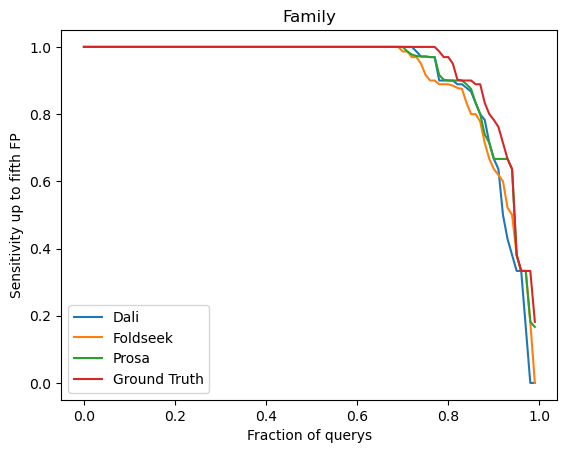

In [57]:
plt.plot(scale,dali, label = 'Dali')
plt.plot(scale,fs, label = 'Foldseek')
#plt.plot(scale,rescale, label = 'Rescaled by sqrt(L1*L2)')
plt.plot(scale,di, label = 'Prosa')
plt.plot(scale,gt, label = 'Ground Truth')
#plt.plot(scale,fsall, label = 'fs all')
plt.title("Family")
plt.xlabel("Fraction of querys")
plt.ylabel("Sensitivity up to fifth FP")
plt.legend()
#plt.ylim(0, 1)

In [173]:
np.mean(dali_res), np.mean(di_res)

(0.8999366499999999, 0.9143068199999999)

In [142]:
alignments = pd.read_csv("benchmark/foldseek100_top1000_querysubset.tsv", sep='\t', header=None)

In [143]:
alignments

,0,1,2,3,4,5,6
0,d1h97a_,d1h97a_,8.479000e-23,1096,NaN,NaN,NaN
1,d1h97a_,d1mbaa_,1.675000e-05,232,NaN,NaN,NaN
2,d1h97a_,d2wtga_,6.543000e-05,202,NaN,NaN,NaN
3,d1h97a_,d1x9fc_,8.858000e-05,192,NaN,NaN,NaN
4,d1h97a_,d1urva_,3.129000e-04,186,NaN,NaN,NaN
...,...,...,...,...,...,...,...
42997,d1oota_,d1nlta3,8.466000e+00,7,NaN,NaN,NaN
42998,d1oota_,d1smxa_,5.940000e+00,7,NaN,NaN,NaN
42999,d1oota_,d1fmba_,9.527000e+00,7,NaN,NaN,NaN
43000,d1oota_,d1kk1a1,8.981000e+00,7,NaN,NaN,NaN


In [160]:
asa = pd.read_csv("benchmark/alignments.csv", sep='\,')
asa

/tmp/ipykernel_7529/2545330875.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  asa = pd.read_csv("benchmark/alignments.csv", sep='\,')


,query,target,bits,lddt,cigar_fs,qstart_fs,tstart_fs,alnlen,q_scope,t_scope,same_fam,same_sfam,same_fold,qstart_dali,tstart_dali,cigar_dali,dali_rank
0,d12asa_,d12asa_,2924,1.0000,327M,1,1,327,d.104.1.1,d.104.1.1,True,True,True,1,1,327M,1
1,d12asa_,d1nnha_,392,0.5557,18M3D11M4I6M5D14M3I19M4I15M1D46M8I4M1D16M1I3M4...,7,11,317,d.104.1.1,d.104.1.1,True,True,True,1,9,23M1I12M4I7M5D9M3I20M1I4M3I10M1I4M2D18M7I47M6I...,2
2,d12asa_,d1b8aa2,389,0.5209,20M3D10M4I5M2I12M3I20M4I13M1I24M1D33M3D4M2I15M...,5,29,342,d.104.1.1,d.104.1.1,True,True,True,1,29,23M1I13M3I4M3I9M3I19M1I4M3I12M1I21M6I27M7D4M1D...,3
3,d12asa_,d1eova2,342,0.5274,21M3D10M5I9M1I8M3I20M4I12M1I27M2I15M7D15M1D3M2...,5,39,340,d.104.1.1,d.104.1.1,True,True,True,1,34,4M1D21M3D12M6I13M3I24M4I12M1I21M2I28M1D4M5D6M4...,5
4,d12asa_,d1l0wa3,277,0.4977,20M3D10M7I39M4I13M1I3M1I19M4I15M6I13M2I23M6I1M...,5,35,330,d.104.1.1,d.104.1.1,True,True,True,1,35,23M1I14M7I37M4I18M2I14M7I23M5I20M5I4M2I4M3D8M1...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362993,d8abpa_,d1zgha2,49,0.3744,6M3I4M3I10M2D10M2I5M2I15M4I13M1I10M,3,2,90,c.93.1.1,c.65.1.1,False,False,False,2,1,9M3I15M1I10M5I6M1D12M1D4M5I9M1I7M4D7M21D17M115...,391
362994,d8abpa_,d7reqa2,49,0.4523,6M2D10M4I16M2D4M4I20M3D15M3D8M,1,37,97,c.93.1.1,c.23.6.1,False,False,False,1,37,8M2D4M3I14M1I11M2I21M2D5M1D9M3D12M1I10M3D6M146...,78
362995,d8abpa_,d2q46a_,49,0.3542,12M1I12M1I3M3I4M1D8M13D11M2D9M25D4M1D2M4D13M1D...,1,3,177,c.93.1.1,c.2.1.2,False,False,False,1,4,11M2I12M1I4M1I9M13D6M3D7M2I10M29D4M1D13M1D6M21...,180
362996,d8abpa_,d2e7ja_,49,0.3734,15M10I9M4I2M3I13M3I8M1D17M3D9M2D5M3D15M3I5M5I1...,109,51,160,c.93.1.1,c.67.1.9,False,False,False,82,1,4M17I4M37D18M6I11M8I14M3I7M5D4M4I10M1D13M7D14M...,388


In [131]:
klasse = "SFAM"
dali_result = pd.read_csv('hyperparameter/result_daliTop5.rocx', delimiter='\t')
di_result = pd.read_csv('100vsall/result_100vsallTop5.rocx', delimiter='\t')


In [132]:
di_res = []
for v in di_result[di_result["NAME"].isin(query_sample)][klasse].values:
    di_res.append(float(v.replace(',', '.')))
dali_res = []
for v in dali_result[dali_result["NAME"].isin(query_sample)][klasse].values:
    dali_res.append(float(v.replace(',', '.')))

In [133]:
dali = np.sort(dali_res)[::-1]
di = np.sort(di_res)[::-1] 

In [134]:
scale = np.arange(0,1,0.01)

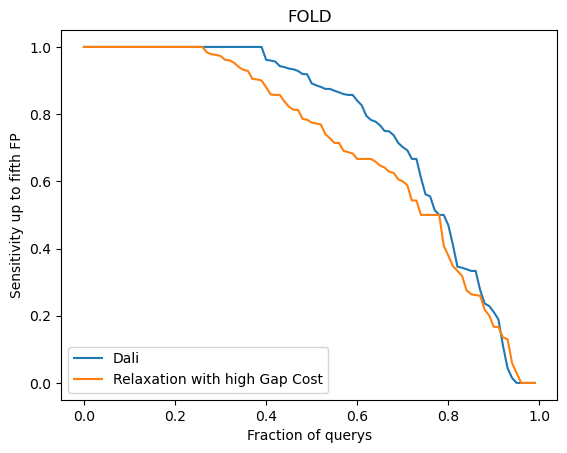

In [135]:
plt.plot(scale,dali, label = 'Dali')
#plt.plot(scale,rescale, label = 'Rescaled by sqrt(L1*L2)')
plt.plot(scale,di, label = 'Relaxation with high Gap Cost')
plt.title("FOLD")
plt.xlabel("Fraction of querys")
plt.ylabel("Sensitivity up to fifth FP")
plt.legend()

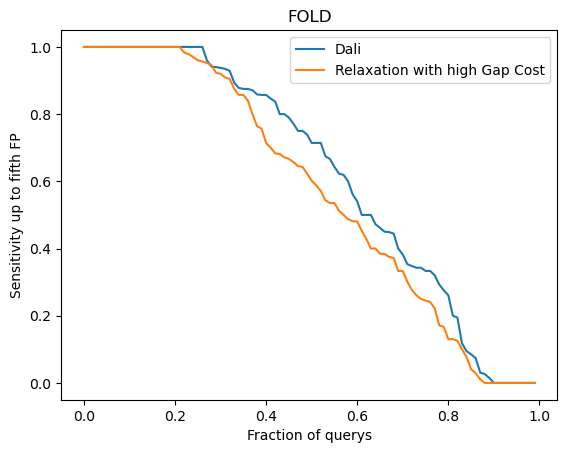

In [130]:
plt.plot(scale,dali, label = 'Dali')
#plt.plot(scale,rescale, label = 'Rescaled by sqrt(L1*L2)')
plt.plot(scale,di, label = 'Relaxation with high Gap Cost')
plt.title("FOLD")
plt.xlabel("Fraction of querys")
plt.ylabel("Sensitivity up to fifth FP")
plt.legend()

In [17]:
di

array([1.        , 1.        , 0.973684  , 0.891304  , 0.826087  ,
       0.666667  , 0.653374  , 0.597015  , 0.589744  , 0.589286  ,
       0.557692  , 0.535714  , 0.5       , 0.5       , 0.428571  ,
       0.428571  , 0.402214  , 0.402214  , 0.4       , 0.394231  ,
       0.392857  , 0.358209  , 0.285714  , 0.285714  , 0.257143  ,
       0.25      , 0.222222  , 0.177419  , 0.16129   , 0.153374  ,
       0.149254  , 0.136364  , 0.129032  , 0.125     , 0.12      ,
       0.116279  , 0.105263  , 0.0961538 , 0.0947368 , 0.0909091 ,
       0.0887097 , 0.0526316 , 0.0501475 , 0.0492958 , 0.0447761 ,
       0.0447761 , 0.0352113 , 0.0337423 , 0.0306748 , 0.0271318 ,
       0.0264151 , 0.0240964 , 0.0176768 , 0.0153374 , 0.0123077 ,
       0.0114943 , 0.00923077, 0.00858369, 0.00754717, 0.00704225,
       0.00429185, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     